In [ ]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.animation import ArtistAnimation, FFMpegWriter

path_bousinessq = "./boussinesq.nc"
path_2dcylinder = "./cylinder2d.nc"

In [ ]:
def loadDataset(path):
    return Dataset(path)

In [ ]:
cylinder2D = loadDataset(path_2dcylinder)
boussinesq = loadDataset(path_bousinessq)
print(cylinder2D)
print(boussinesq)

## Info about the datasets

### Cylinder 2D

    dimensions(sizes): xdim(640), ydim(80), tdim(1501), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim), float32 nu(const),                             float32 radius(const), float32 Re(const)

### Bousinessq


    dimensions(sizes): xdim(150), ydim(450), tdim(2001), const(1)

    variables(dimensions): float32 u(tdim,ydim,xdim), float32 v(tdim,ydim,xdim), float32 xdim(xdim), float32 ydim(ydim), float32 tdim(tdim),
                           float32 radius(const), float32 obstacle_pos_x(const), float32 obstacle_pos_y(const)

### Accessing variables

    cylinder2D['variable_name']


In [ ]:
type(cylinder2D['xdim'])
print(cylinder2D['u'].shape)
print(cylinder2D['tdim'].shape)

In [ ]:
data = cylinder2D

def velFromUV(data):
    
    u = data['u'][1000,:,:]
    v = data['v'][1000,:,:]

    vel = np.sqrt(u**2 + v**2)

In [ ]:
u = np.array(cylinder2D['u'])

fig, ax = plt.subplots()
ims = [[ax.imshow(u[i], animated=True)] for i in range(1, len(u))]

ani = ArtistAnimation(fig, ims, interval=1000 , blit=True, repeat_delay=1000)

# plt.show()

# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

In [ ]:
plt.matshow(data['v'][1000,:,:])
plt.axis('off')
plt.show()

```
% Create snapshot matrix
Nt = length(S(1,1,:));
S = reshape(permute(S, [3 2 1]), Nt, [ ]); % Reshape data into a matrix S with Nt rows
U = S - repmat(mean(S,1), Nt, 1); % Subtract the temporal mean from each row

% Create correlation matrix
C_s = (U*U')/(Nt-1);

% Solve eigenvalue problem
[A_s LAM_s] = eig(C_s,'vector');

% Sort eigenvalues and eigenvectors
[lambda_s,ilam_s] = sort(LAM_s,'descend');
A_s = A_s(:, ilam_s);

% These are the temporal modes
% Calculate spatial coefficients
PHI_s = U'*A_s;

% Reconstruction on mode k
k = 1; % for example
Utilde_k_s = A_s(:,k)*PHI_s(:,k)';

% Normalization to match direct and snapshot modes (optional)
PHI = normc(PHI_s);

% Spatial modes
A = U*PHI;

% Time coefficients
Utilde_k = A(:,k)*PHI(:,k)';
% Reconstruction on mode k
```

In [ ]:
S = np.transpose(u, (1,2,0))
print(S.shape)
Nt = u.shape[0]
print(Nt)
U = 

In [ ]:
from zipfile import ZipFile

url = "https://cgl.ethz.ch/Downloads/Data/ScientificData/cylinder2d_nc.zip"
file_name = "../data2/" + url.split('/')[-1]
with ZipFile(file_name, 'r') as zipObj:
   zipObj.extractall('temp')

# Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
Input=np.load('../data/cylinder_u.npy')

In [ ]:
Output=np.load('../output/16_400.npy')
# ip=np.load('../input/200.npy')

In [ ]:
plt.imshow(Output[0,-1])

In [ ]:
plt.imshow(Input[1475])
# plt.imshow(ip[510])

In [ ]:
# plt.imshow(Input[500])
plt.imshow(Input[950])

In [ ]:
fig=plt.figure(1)
plt.subplot(2, 1, 1)
plt.imshow(Output[800])
plt.subplot(2,1,2)
plt.imshow(Input[800])
plt.savefig('comp')

In [ ]:
plt.imshow(Output[800]-ip[800])
plt.colorbar(orientation='horizontal')

In [ ]:
np.max(Output[200][:,100]-Input[200][:,100])

In [ ]:
print(np.min(Input[800]))
print(np.min(Output[800]))
print(np.max(Input[800]))
print(np.max(Output[800]))

In [ ]:
print(np.min(ip[800]))
print(np.max(ip[800]))

In [ ]:
import numpy as np
import pyJHTDB

In [ ]:
# 2048×512×1536
t = np.linspace(0, 8*np.pi, 512)
l = np.linspace(-1, 1, 128)
x = np.zeros((t.shape[0], l.shape[0], 3), np.float32)
# print(t[np.newaxis, :].shape)
x[:, :, 0] = t[:, np.newaxis]
x[:, :, 1] = l[np.newaxis,:]
x[:, :, 2] = 0.
print(x.shape)
# x = x.transpose(0,2,1)
# print(x)

In [ ]:
t1 = np.linspace(0, 2*3.14, 256)
t2 = np.linspace(-0.5, 0.5, 256)
x = np.zeros((t1.shape[0], t2.shape[0], 3), np.float32)
x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0
print(x.shape)

In [ ]:
xy = np.mgrid[0:2048:8*np.pi, 0:1534:3*np.pi]#.reshape(2048,-1).T
print(xy.shape)
# print(xy)

In [ ]:
lJHTDB = pyJHTDB.libJHTDB()
lJHTDB.initialize()

#Add token
auth_token  = "edu.cmu.andrew.ppant-68a123d6"  #Replace with your own token here
lJHTDB.add_token(auth_token)

import pyJHTDB.dbinfo
T = pyJHTDB.dbinfo.channel5200['time'][-1]
# T =10.0

# Select points in the database to query
# lpoints = []
# for i in range(0,3):
#     lpoints.append([np.random.uniform(0, 8*3.14),np.random.uniform(-1, 1),np.random.uniform(0, 3*3.14)])

# # 2D array with single precision values
# points = np.array(lpoints,dtype='float32')

# time = np.random.random()*T
time = 24.0
# u = lJHTDB.getData(
#                time,
#                x,
#                sinterp = 4,
#                data_set ='channel5200',
#                getFunction='getVelocity')
# ubox = lJHTDB.getBoxFilter(
#                time,
#                x,
#                field = 'velocity',
#                data_set = 'channel',
#                filter_width = 5*(2*np.pi / 1024))
# lJHTDB.finalize()
result = lJHTDB.getData(time, x, data_set='channel',
        sinterp = 4, tinterp = 0,
        getFunction = 'getVelocity')
print(result.shape)
# print(result)
# print(u.shape)
print(time)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(result[:,:,0])
plt.imsave('try.png', result[:,:,0])

In [ ]:
# print(u.shape)
fig = plt.figure(figsize = (t1[-1] - t1[0], t2[-1] - t2[0]))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow([:,:,0],
         extent = [t1[0], t1[-1] - t1[0], t2[0], t2[-1] - t2[0]],
         interpolation = 'none')

In [ ]:
import shutil
T = np.arange(0., 25.0, 0.01)
X = np.linspace(0, 8*np.pi, 4)
Y = np.linspace(-1, 1, 4)
Z = np.arange(0, 3*np.pi, 0.1)x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0

x = np.zeros((p.shape[0], p.shape[0], 3), np.float32)
les = []
dns = []
count = 0
# if os.path.exists('DNS-LES/les'):
#     shutil.rmtree('DNS-LES/les')
# if os.path.exists('DNS-LES/dns'):
#     shutil.rmtree('DNS-LES/dns')
if not os.path.exists('DNS-LES/les'):
    os.mkdir('DNS-LES/les')

if not os.path.exists('DNS-LES/dns'):
    os.mkdir('DNS-LES/dns')

In [ ]:

def create_turb_dataset(t):
    count = 0
    Nx = 512
    Ny = 128
    #for t in T:
    start_time = time.time()
    print("Time:",t)
    for idx in range(len(X)-1):
        px = np.linspace(X[idx], X[idx+1], Nx)
        for idy in range(len(Y)-1):
            py = np.linspace(Y[idy], Y[idy+1], Ny)
            for z in Z:
            
                x[:, :, 0] = px[np.newaxis, :]
                x[:, :, 1] = py[:, np.newaxis]
                x[:, :, 2] = z

                u, u_box= u_data(t, x)
                #les.append(u_box)
                #dns.append(u)
                if not os.path.exists('DNS-LES/les/%.2f'%t):
                    os.mkdir('DNS-LES/les/%.2f'%t)
                if not os.path.exists('DNS-LES/dns/%.2f'%t):
                    os.mkdir('DNS-LES/dns/%.2f'%t)

                for itx in range(3):
                    norm1 = cv2.normalize(u[:,:,itx], 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    norm2 = cv2.normalize(u_box[:,:,itx], 0, 255,norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
                    if count%100 == 0:
                        print(count)

                    cv2.imwrite("DNS-LES/dns/%.2f/%d.png"%(t,count), norm1)
                    cv2.imwrite("DNS-LES/les/%.2f/%d.png"%(t,count), norm2)
                    count+=1
                    end_time = time.time()
    print("Time: {:.2f} s".format(end_time-start_time))

In [ ]:
# 2048×512×1536
px = np.linspace(0, 8*np.pi, 512)
py = np.linspace(-1, 1, 128)
x = np.zeros((px.shape[0], py.shape[0], 3), np.float32)
# print(t[np.newaxis, :].shape)
x[:, :, 0] = px[:, np.newaxis]
x[:, :, 1] = py[np.newaxis,:]
x[:, :, 2] = 0.

T = np.linspace(0., 25.9, 1000)
dataset = np.zeros((len(T), 512, 128))

for idx, time in enumerate(T):
    print(idx)
    dataset[idx] = lJHTDB.getData(time, x, data_set='channel',
        sinterp = 4, tinterp = 0,
        getFunction = 'getVelocity')[:,:,0]
print(dataset.shape)
np.save('../data/channel_data.npy', dataset)

In [ ]:
A = np.zeros(5)
print(A)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
dataset = np.load('../data/channel_data_2500.npy')
print(dataset.shape)
plt.imshow(dataset[-1])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

u_comp = np.load('../data/Velocity160.npz', allow_pickle=True)
u_flat = u_comp['arr_0']
print(u_flat.shape)
u = u_flat.reshape(u_flat.shape[0], 320, 80)
u = np.transpose(u, (0, 2, 1))
u_new = np.zeros((u.shape[0], 80, 640))
u_new[..., :320] = u
u = u_new.astype(np.float32)
plt.matshow(u[2000])

In [ ]:
for it in u:
    print(it)

In [ ]:
u['arr_0'].shape

In [ ]:
u = np.load('../data/Velocity160.npz', allow_pickle=True)
u = u_comp['arr_0']
# u = u_flat.reshape(u_flat.shape[0], 320, 80)
# u = np.transpose(u, (0, 2, 1))
print(u.shape)
plt.matshow(u[200])


In [ ]:
dataset = np.load('../data/channel_data_2500.npy')
print(dataset.shape)

(1223, 80, 160)
3.51482 0.0


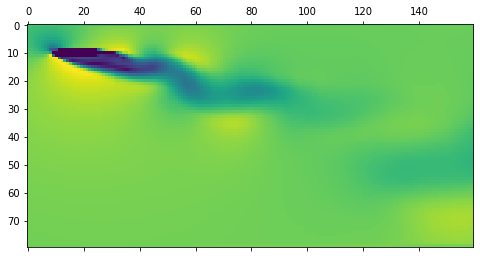

In [18]:
import numpy as np
import matplotlib.pyplot as plt 
u_flat = np.load('../data/airfoil_80x320_data.npy', allow_pickle=True)
# u_flat = u_comp['arr_0']
u = u_flat.reshape(u_flat.shape[0], 320, 80)
u = np.transpose(u, (0, 2, 1))[:,:,140:-20]
# u_new = np.zeros((u.shape[0], 80, 640))
# u_new[..., :320] = u
# u = u_new.astype(np.float32)
print(u.shape)
print(np.max(u_flat), np.min(u_flat))
plt.matshow(u[400])

(1500, 64800)
(1500, 160, 320)
65.4571 1.29765e-10


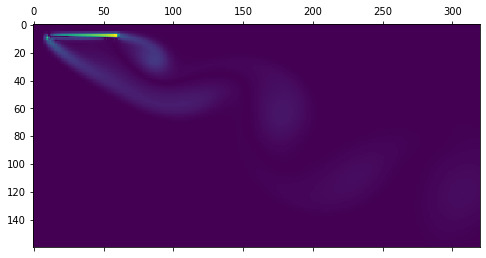

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
u_flat = np.load('../data/platekepsilon.npy', allow_pickle=True)
print(u_flat.shape)
# u_flat = u_comp['arr_0']
u = u_flat.reshape(u_flat.shape[0], 360, 180)
u = np.transpose(u, (0, 2, 1))[:,:-20,:-40]
# u_new = np.zeros((u.shape[0], 80, 640))
# u_new[..., :320] = u
# u = u_new.astype(np.float32)
print(u.shape)
print(np.max(u_flat), np.min(u_flat))
plt.matshow(u[400])